<img src="", width=150, ALIGN="left", border=20>
<center>
<h1>Air Quality Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 2.7.13 | Anaconda 4.3.1 (https://anaconda.org/)<br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

# Introduction

The Air Quality challenge is a regression problem inspired from the Kaggle challenge <a href="https://www.kaggle.com/nelsonchu/air-quality-in-northern-taiwan">Air Quality in Northern Taiwan</a>, formatted in the AutoML format. 


In [1]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

<h1> Step 1: Exploratory data analysis </h1>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

In [2]:
datadir = 'sample_data'              # Change this to the directory where you put the input data
dataname = 'air'
!ls $datadir*

air_feat.name	 air_test.data	    air_train.solution	feature.name
air_label.name	 air_test.solution  air_valid.data
air_public.info  air_train.data     air_valid.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data. YOU MIGHT WANT TO KEEP THIS UNTIL THE NEXT YELLOW BLOCK.

In [3]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname)                # The data are loaded as a Pandas Data Frame
target_name = data.columns.values[-1]                       # The last column is the target

Reading sample_data/air_train from AutoML format
Number of examples = 500
Number of features = 14
Number of labels = 1


In [4]:
data.head()

,AMB_TEMP,CH4,CO,NMHC,O3,PM10,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,NOx
0,16,1,0,0,35,62,61,4,2,1,77,78,5,4,14
1,32,1,0,0,19,11,73,0,1,1,102,98,2,2,5
2,23,1,0,0,26,23,91,2,2,1,204,220,1,1,31
3,13,1,0,0,55,45,95,0,2,1,145,145,2,1,4
4,20,1,0,0,42,44,48,1,2,1,92,85,1,1,6


In [5]:
data.describe() 

,AMB_TEMP,CH4,CO,NMHC,O3,PM10,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,NOx
count,500.000000,500.000000,500.000000,500.000000,500.0000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,23.732000,1.162000,0.132000,0.002000,28.3700,50.79400,76.11800,2.792000,1.932000,0.982000,147.172000,146.516000,1.88600,1.390000,25.982000
std,5.168908,0.374214,0.393555,0.044721,17.5884,223.30139,13.09699,2.599664,0.328011,0.631247,79.590626,78.768463,1.61065,1.587116,23.827067
min,7.000000,0.000000,0.000000,0.000000,0.0000,3.00000,27.00000,-6.000000,0.000000,0.000000,4.000000,0.000000,0.00000,0.000000,1.000000
25%,20.000000,1.000000,0.000000,0.000000,16.0000,25.75000,67.00000,1.000000,2.000000,1.000000,84.000000,83.000000,1.00000,0.000000,11.000000
50%,24.000000,1.000000,0.000000,0.000000,29.0000,36.00000,77.00000,2.000000,2.000000,1.000000,145.000000,145.000000,2.00000,1.000000,20.000000
75%,27.000000,1.000000,0.000000,0.000000,39.0000,50.00000,86.00000,3.000000,2.000000,1.000000,206.250000,200.250000,2.00000,2.000000,32.000000
max,36.000000,2.000000,2.000000,1.000000,99.0000,5004.00000,100.00000,23.000000,3.000000,9.000000,357.000000,352.000000,17.00000,16.000000,203.000000


We can see here the correlation matrix, which shows how correlated each columns are with each others.

The column 'NOx' is the column we wish to predict, in this case, we can see high correlation with 'CO', 'NMHC' and 'CH4'.

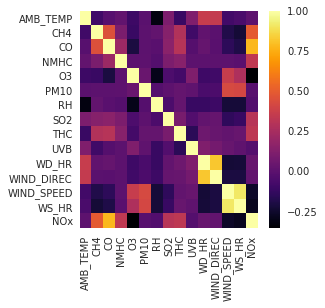

In [6]:
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(), cmap='inferno')
plt.xticks(np.arange(data.columns.shape[0])+0.5,data.columns, rotation=90)
plt.yticks(np.arange(data.columns.shape[0])+0.5,data.columns, rotation=0)
plt.show()

With the histograms, we see that the most columns are of a 'gaussian' nature. Except some such as 'PM10', which are more like a poisson law. Which depending on your algorithm could cause problems.

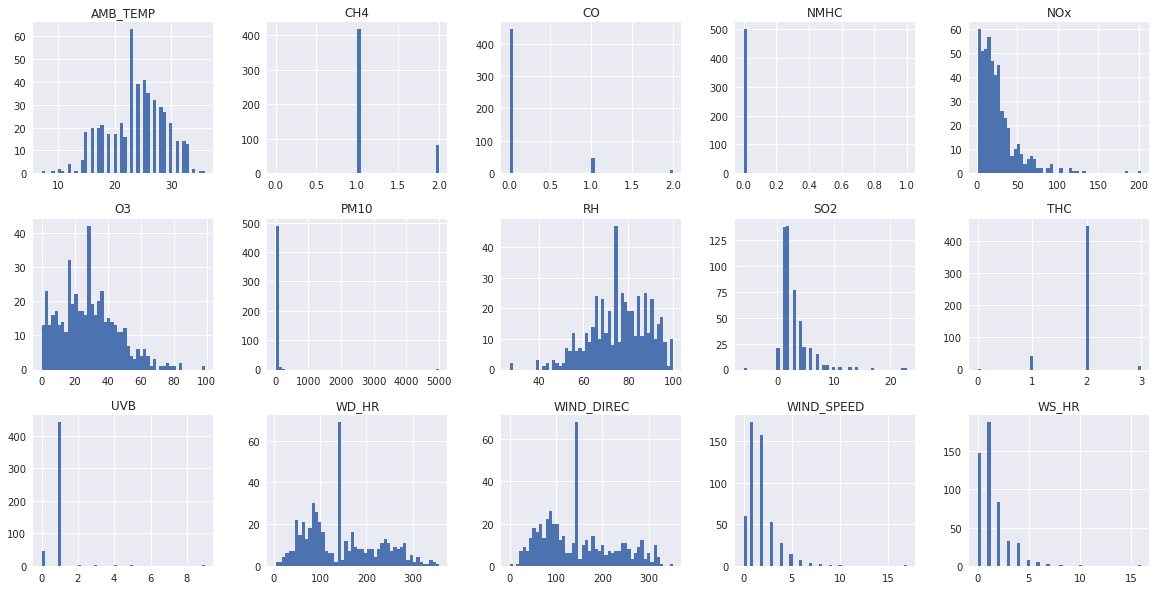

In [7]:
data.hist(figsize=(20, 10), bins=50, layout=(3, 5));

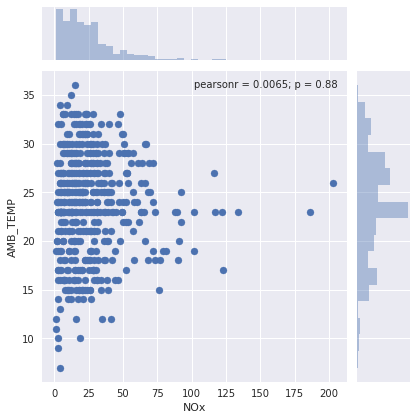

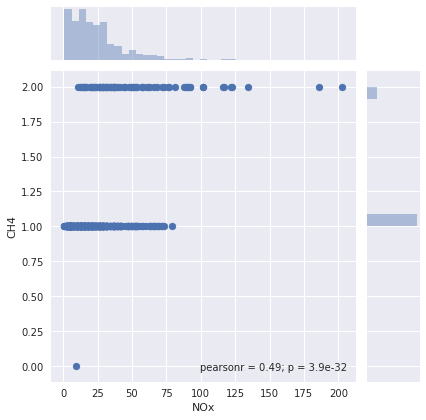

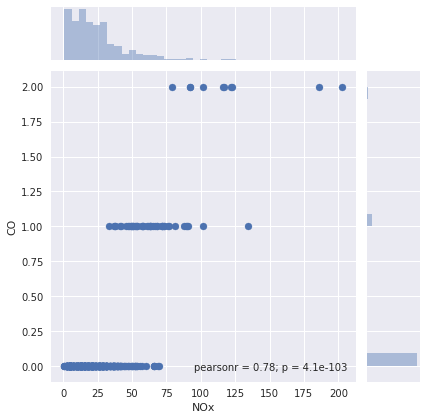

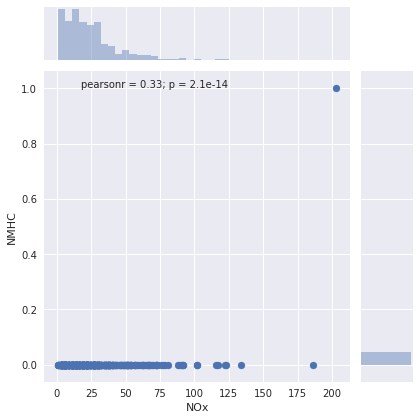

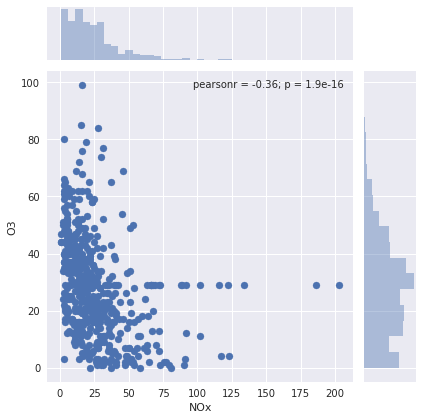

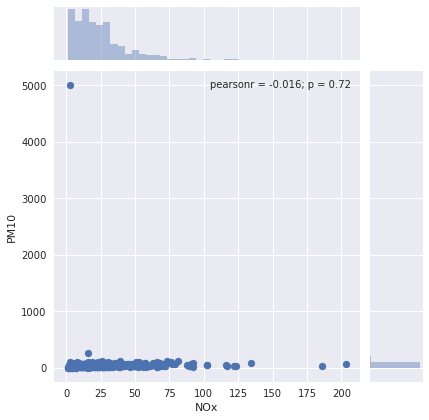

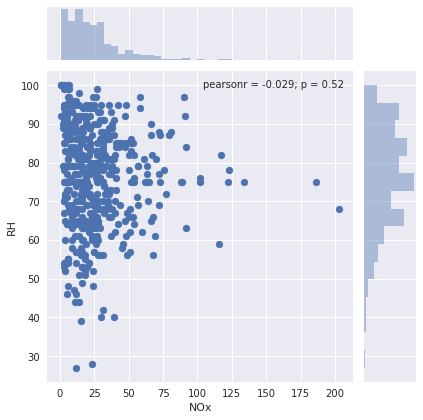

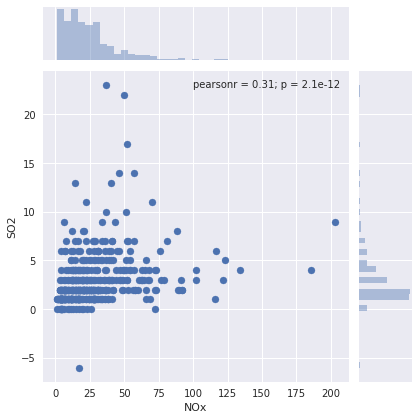

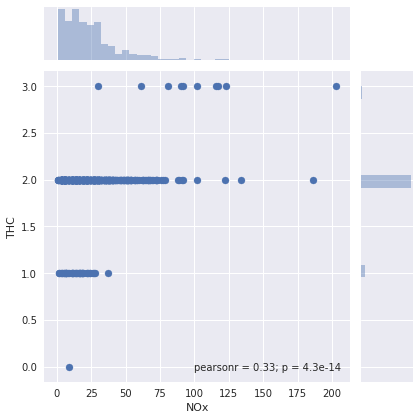

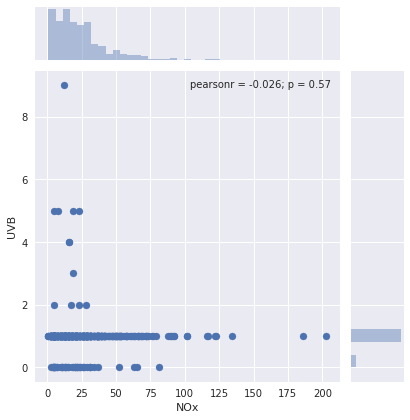

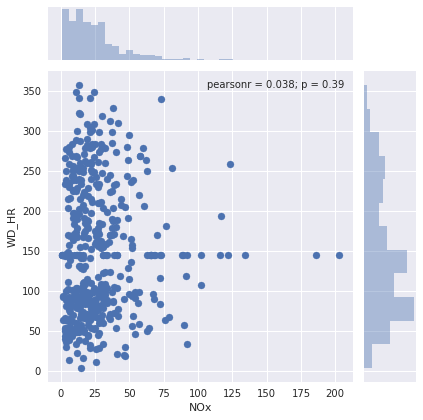

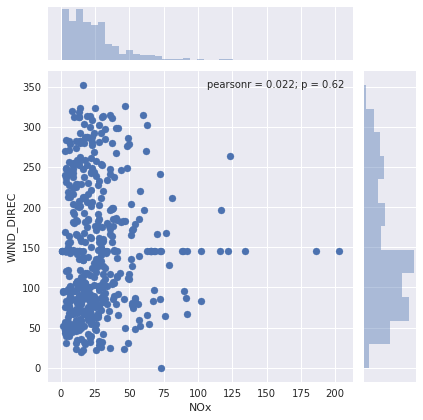

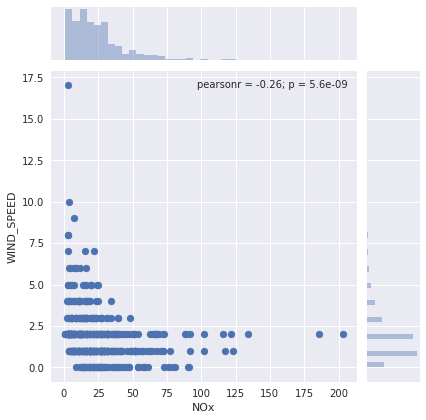

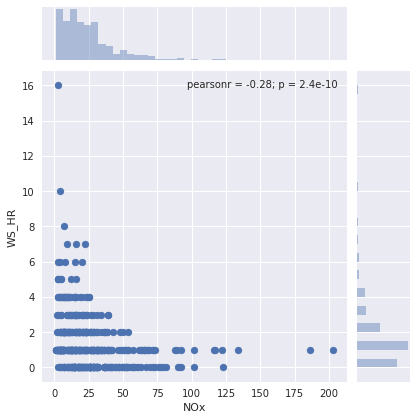

In [8]:
for i in range(len(data.columns.values)-1):
    sns.jointplot(x="NOx", y=data.columns.values[i], data=data)

# Step 2: Building a predictive model


## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [9]:
from data_manager import DataManager
D = DataManager(dataname, datadir, replace_missing=True)
print (D)

Info file found : /home/ash/Desktop/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data/air_public.info
DataManager : air
info:
	has_categorical = 0
	format = dense
	usage = Air Quality
	time_budget = 499
	metric = r2_metric
	label_num = NA
	train_num = 71686
	name = air
	target_type = Numerical
	feat_type = Numerical
	test_num = 71685
	valid_num = 73858
	is_sparse = 0
	has_missing = 0
	feat_num = 14
	target_num = 1
	task = regression
data:
	X_train = array(500, 14)
	Y_train = array(500,)
	X_valid = array(500, 14)
	X_test = array(500, 14)
feat_type:	array(14,)
feat_idx:	array(0,)



## Training a predictive model
We provide an example of predictive model (regression) in the `sample_code_submission/` directory. It's a simple decision tree regressor. Find a better model and replace it.

In [10]:
from model import model
??model 

<h3>Create or reload model</h3>
Create an instance of the model (run the constructor) and attempt to reload a previously saved model from `sample_code_submission/*_model.pickle` if `reload_model=1`.<br>
If you saved have an aldeady trained model saved in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. <br>
When you reload a model, you risk to reload a model trained on the wrong data. Delete `*_model.pickle` from `sample_code_submission/` if you do not want this to happen.

In [11]:
M = model()   
reload_model=0                       # Change to 1 to reload an already trained model

trained_model_name = model_dir + dataname
if reload_model:    
    M = M.load(trained_model_name)                  # Attempts to re-load an already trained model

<h3> Training:</h3>

In [12]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

if not(M.is_trained):                               # No need to train if model already trained
    M.fit(X_train, Y_train)  

### Making predictions:

In [13]:
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

### Saving:
Save the trained model (will be ready to reload next time around) and save the prediction results:

In [14]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/air_test.predict
sample_result_submission/air_train.predict
sample_result_submission/air_valid.predict


## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `r2_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the coefficient of determination. 

In [15]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
import libscores, my_metric
try:
    scoring_function = getattr(libscores, metric_name)
except:
    scoring_function = getattr(my_metric, metric_name)
print ('Using scoring metric:', metric_name)
??scoring_function

Using scoring metric: r2_regression


### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions. 

In [16]:
Y_train =  Y_train.ravel() # We need this conversion to a line vector

In [17]:
print ('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print ('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the r2_regression metric = 0.8367
Ideal score for the r2_regression metric = 1.0000


In [18]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 5-fold cross-validation
n = 5
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

Fold 1 example metric =  0.641135869059
Fold 2 example metric =  0.564993987219
Fold 3 example metric =  0.331327627793
Fold 4 example metric =  0.714006368314
Fold 5 example metric =  0.539823700606
Average score =  0.558257510598


# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [19]:
outdir = 'sample_result_submission'     

In [20]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /home/ash/Desktop/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data
Using output_dir: /home/ash/Desktop/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_result_submission
Using program_dir: /home/ash/Desktop/MINI_PROJECT_ECOLO_TEAM/starting-kit/ingestion_program
Using submission_dir: /home/ash/Desktop/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Air ********
************************************************
========= Reading and converting data ==========
Info file found : /home/ash/Desktop/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data/air_public.info
========= Reading /home/ash/Desktop/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data/air_feat.type
[+] Success in  0.00 sec
========= Reading /home/ash/Desktop/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data/air_train.data
Replace missing values by 0 (slow, sorry)
[+] Success in  0.0

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.